In [7]:
prefix = '/home/ines/repositories/'
# prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [8]:
import os
import numpy as np
import pickle
import pandas as pd
from scipy.stats import zscore
from brainbox.io.one import SessionLoader
from sklearn.preprocessing import StandardScaler
import gc
import concurrent.futures
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import seaborn as sns 

# Get my functions

# from functions import  get_speed

functions_path =  prefix + '/representation_learning_variability/Functions/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from video_functions import lick_psth
# functions_path =  prefix + '/representation_learning_variability/Functions/'
# os.chdir(functions_path)
# from one_functions_generic import timeseries_PSTH

from one.api import ONE
one = ONE(mode='remote')

In [9]:
extra_sessions = ['2d7c0f7f-e805-404b-914a-23d83998e08e',
'7691eeb3-715b-4571-8fda-6bb57aab8253',
'a28746ff-a6e0-403d-a11d-893c2f9a44b4',
'f140a2ec-fd49-4814-994a-fe3476f14e66',
'bd8b204f-a42e-45c1-a8f0-71c6223a6657',
'e4fac833-d985-4bb2-a97a-c4d7ed8d06e1',
'13b70283-e8d3-4e69-ae3f-83f50c9602e2',
'e34ee0ad-3ad8-4faa-b4d5-c1cc0cf3b496',
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536',
'd9f0c293-df4c-410a-846d-842e47c6b502',
'86f741b4-9dee-4c28-8ee9-49f3656ab419',
'650a0a90-4bf3-4489-9bcd-75baf0a49eac',
'a2be3311-de26-48b3-bfc7-317e94a4fdd3',
'12f95449-6914-4d76-9eb3-7d79757a4a77',
'd9907ac3-7378-471d-91fb-c8ec34870e17',
'b4a8ec28-46ad-4b6f-908b-650d0970a0db',
'c51f34d8-42f6-4c9c-bb5b-669fd9c42cd9',
'71963e7f-5947-4c3e-bcc8-dfdef3d71be7',
'7471a326-894d-4b55-8b01-a0ad56af209c',
'8839a67d-991a-4694-9c45-b3af73ce4d36',
'db4fe6df-b1d2-4958-9c93-e71696d58f7f',
'80653a5b-c7aa-479d-9ae0-c92f296fface',
'169c9a39-cb63-4b77-93e2-10e076d4c472',
'495bee7e-b58e-42ea-8481-4a1bfedca54a',
'1db57661-5ad3-4465-b9ee-08473af9c2e8',
'3513e7f2-d2e6-4411-8055-54dac50458f6',
'd035c5ba-d51e-49a9-a94b-23531a598ec3',
'6a369bfa-a70b-4147-af25-d03772ff8d96',
'7050ae29-a99e-43f1-aa42-b4416200351c',
'3fa080ff-bcce-43e8-bd5f-601f0591f785',
'369c3073-e886-4b28-a32b-a5860df21392',
'aa8c915b-cc12-4022-8339-3faa438d7fe2',
'8b422ab2-fc98-4d25-ac1f-e239ca869d9e',
'87d86bb0-72d3-4213-be72-392295d3d601',
'2ab80a04-96f6-45f8-bf69-7eac67f81742',
'57701dff-8107-4ab6-ac7a-b087a2e4cc94',
'42541dce-2ffb-452e-bf54-119aee2ae48a',
'89848cb4-77d3-4db2-877e-2fa73a3cf5f6',
'33cbe984-deb7-489c-add6-d98ac9f64df6',
'0b5f5111-5647-4400-8e08-f57975027b5e',
'9e77877d-6fcf-4e91-9337-4b19277561d5',
'dc36f1b9-5dba-49c4-b333-ad08af6b8f86',
'8a039e2b-637e-45ed-8da6-0641924626f0',
'00d3c9ea-2c91-44c2-b03e-6dfec5e08f27',
'e698b903-98ed-48b9-bc40-664274f722da',
'e5094e8a-cd54-43d4-8a7a-c5aa54b15e19',
'09137957-7216-40ea-90b5-ef85a62b578a',
'03f0ed7f-e647-4732-ae1a-d41fc459138b',
'4373de88-6b08-4185-a224-f898fd0017d4',
'30c4e2ab-dffc-499d-aae4-e51d6b3218c2',
'1e07df0b-205b-4c94-8e02-2ae07dae4347',
'5c7d2345-1f0e-40e5-aad7-2c6133b71b09',
'1735d2be-b388-411a-896a-60b01eaa1cfe',
'14736609-bfdd-4620-8e47-09d7f4bc4412',
'4537bd9a-0a63-4462-870c-5f6d70d289ed',
'1715d2bc-4da3-4de2-9631-3ab1c600f2bf',
'aed404ce-b3fb-454b-ac43-2f12198c9eaf',
'f115196e-8dfe-4d2a-8af3-8206d93c1729',
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b',
'c728f6fd-58e2-448d-aefb-a72c637b604c',
'c8fc81e8-fd09-4228-a08c-81c01f21381a',
'7502ae93-7437-4bcd-9e14-d73b51193656',
'297bd519-78f8-45d2-af85-835e865e228f',
'7b074b1a-6576-4380-91e4-ad6cdf06c3a6',
'064a7252-8e10-4ad6-b3fd-7a88a2db5463']

In [158]:
""" Load BWM data post-QC """

data_path = prefix + '/representation_learning_variability/paper-individuality/'
filename = '1_bwm_qc_07-10-2025'


data_path = prefix + 'representation_learning_variability/Video and wheel/Video QC/'
filename = 'final_lp_qc07-10-2025'


bwm_query = pickle.load(open(data_path+filename, "rb"))


In [11]:
# Loop through animals
# sessions = bwm_query['eid'].unique()
sessions = extra_sessions
data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/extra_bwm/'
os.chdir(data_path)
files = os.listdir()
sessions_to_process = []

for s, sess in enumerate(sessions):
    file_path = one.eid2path(sess)

    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    filename = "design_matrix_" + str(sess) + '_'  + mouse_name
    if filename in files:
        sessions_to_process.append((sess))

len(sessions_to_process)

62

In [12]:
def plot_licks_PSTH(eid, trial_df, lick_times, save_path):
    
    data = lick_psth(trial_df, lick_times, 1, 2, event='feedback_times')
    
    if len(data) > 0:
        # data = data[0]
        trials = data['trial']
        num_trials = int(np.max(trials))
        # Plot data
        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[9, 5])
        for t, trial in enumerate(range(num_trials)):
            licks_correct = np.array(data.loc[(data['trial']==t) & (data['correct']==1), 'lick_times'])
            licks_incorrect = np.array(data.loc[(data['trial']==t) & (data['correct']==-1), 'lick_times'])
            ax.scatter(licks_correct, np.full_like(licks_correct, t), color='green', s=1)
            ax.scatter(licks_incorrect, np.full_like(licks_incorrect, t), color='red', s=1)

        ax.set_xlabel('Time from feedback')
        ax.set_ylabel('Trial')
        plt.savefig(str(save_path + eid + 'lick_psth_-12_feedback.png'), format='png')
        plt.show()
        
    else:
        print('No PSTH for session ' + eid)
        
# This function uses get_XYs, not smoothing, is closer to brainbox function: https://github.com/int-brain-lab/ibllib/blob/78e82df8a51de0be880ee4076d2bb093bbc1d2c1/brainbox/behavior/dlc.py#L63
def get_speed(poses, times, camera, sampling_rate, split, feature):
    """
    FIXME Document and add unit test!

    :param dlc: dlc pqt table
    :param dlc_t: dlc time points
    :param camera: camera type e.g 'left', 'right', 'body'
    :param feature: dlc feature to compute speed over
    :return:
    """

    RESOLUTION = {'left': 2,
                  'right': 1,
                  'body': 1}
    sampling_rate = 60

    speeds = {}
    times = np.array(times)
    x = poses[f'{feature}_x'] / RESOLUTION[camera]
    y = poses[f'{feature}_y'] / RESOLUTION[camera]

    dt = np.diff(times)
    tv = times[:-1] + dt / 2


    # Calculate velocity for x and y separately if split is true
    if split == True:
        s_x = np.diff(x) * sampling_rate
        s_y = np.diff(y) * sampling_rate
        speeds = [times, s_x, s_y]
        # interpolate over original time scale
        if tv.size > 1:
            ifcn_x = interpolate.interp1d(tv, s_x, fill_value="extrapolate")
            ifcn_y = interpolate.interp1d(tv, s_y, fill_value="extrapolate")
            speeds = [times, ifcn_x(times), ifcn_y(times)]
    else:
        # Speed vector is given by the Pitagorean theorem
        s = ((np.diff(x)**2 + np.diff(y)**2)**.5) * sampling_rate
        speeds = [times, s]
        # interpolate over original time scale
        if tv.size > 1:
            ifcn = interpolate.interp1d(tv, s, fill_value="extrapolate")
            speeds = [times, ifcn(times)]

    return speeds  

def event_locked_signal(t, v, events, window=(-.5,1)):
    fs = 1/np.median(np.diff(t))
    w = np.arange(int(window[0]*fs), int(window[1]*fs))
    idx = np.searchsorted(t, events)
    X = np.stack([v[i+w] for i in idx if i+w.min()>=0 and i+w.max()<len(v)])
    return X, w/fs


def plot_whisker_psth(mat, design_matrix, trial_df, event, save_path):

    X, tscale = event_locked_signal(np.array(design_matrix['Bin']), np.array(design_matrix['avg_whisker_me']), trial_df[event])
    m = np.nanmean(X, axis=0)
    s = np.nanstd(X, axis=0) / np.sqrt(np.sum(~np.isnan(X), axis=0))
    plt.plot(tscale, m)
    plt.fill_between(tscale, m - s, m + s, alpha=0.3)
    plt.axvline(0, color='k')
    plt.xlabel("Time from event (s)")
    plt.ylabel("Whisker ME")

    # Save the plot as a PNG file
    plt.savefig(str(save_path + mat + '_me_psth.png'), format='png')
    plt.show()


def plot_paw_hist(mat, design_matrix, save_path):

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=False, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=False, feature='r_paw')
    
    # Create main figure
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    # Define areas
    main_ax = fig.add_subplot(grid[1:4, 0:3])
    x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
    y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

    # Scatterplot (two hues)
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), left_speeds[1], alpha=0.2, s=.1, label='Left paw', color='C0')
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), right_speeds[1], alpha=0.2, s=.1, label='Right paw', color='C1')
    main_ax.legend()
    
    # Marginal histograms
    y_hist.hist([left_speeds[1],right_speeds[1]], bins=100, color=['C0', 'C1'], alpha=0.6, orientation='horizontal')
    x_hist.hist([np.abs(design_matrix['avg_wheel_vel']), np.abs(design_matrix['avg_wheel_vel'])], bins=100, color=['C0', 'C1'], alpha=0.6)

    # Hide tick labels on shared axes
    main_ax.set_ylim([-5, int(np.nanmax([left_speeds[1], right_speeds[1]])/2)])
    main_ax.set_xlim([-.1, int(np.nanmax(np.abs(design_matrix['avg_wheel_vel']))/2)])
    main_ax.set_xlabel('Wheel velocity')
    main_ax.set_ylabel('Paw velocity')
    main_ax.set_title(mat)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(str(save_path + mat + '_paw_hist.png'), format='png')
    plt.show()

def plot_paw_choice_psth(mat, design_matrix, trial_df, save_path):

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=True, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=True, feature='r_paw')

    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=[9, 5])

    for c, choice in enumerate([-1.0, 1.0]):

        use_data = trial_df.loc[trial_df['choice']==choice]
        right_paw, r_tscale = event_locked_signal(right_speeds[0], right_speeds[1], use_data['stimOn_times'])
        left_paw, l_tscale = event_locked_signal(left_speeds[0], left_speeds[1], use_data['stimOn_times'])

        l = np.nanmean(left_paw, axis=0)
        s_l = np.nanstd(left_paw, axis=0) / np.sqrt(np.sum(~np.isnan(l), axis=0))
        ax[c].plot(l_tscale, l, label='left')
        ax[c].fill_between(l_tscale, l - s_l, l + s_l, alpha=0.3)
        ax[c].legend()
        r = np.nanmean(right_paw, axis=0)
        s_r = np.nanstd(right_paw, axis=0) / np.sqrt(np.sum(~np.isnan(r), axis=0))
        ax[c].plot(r_tscale, r, label='right')
        ax[c].fill_between(r_tscale, r - s_r, r + s_r, alpha=0.3)
        ax[c].axvline(0, linestyle='dashed', color='k')
        ax[c].set_title('Choice'+str(choice))
        ax[c].set_xlabel("Time from event (s)")
        ax[c].set_xlim([-0.25, 0.75])
        ax[c].set_ylabel("Velocity")

    plt.savefig(str(save_path + mat + 'paw_choice_psth.png'), format='png')
    plt.show()

def plot_paw_feedback_psth(mat, design_matrix, trial_df, save_path):

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=True, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=True, feature='r_paw')

    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=[9, 5])

    for c, choice in enumerate([-1.0, 1.0]):

        use_data = trial_df.loc[trial_df['feedbackType']==choice]
        right_paw, r_tscale = event_locked_signal(right_speeds[0], right_speeds[1], use_data['stimOn_times'])
        left_paw, l_tscale = event_locked_signal(left_speeds[0], left_speeds[1], use_data['stimOn_times'])

        l = np.nanmean(left_paw, axis=0)
        s_l = np.nanstd(left_paw, axis=0) / np.sqrt(np.sum(~np.isnan(l), axis=0))
        ax[c].plot(l_tscale, l, label='left')
        ax[c].fill_between(l_tscale, l - s_l, l + s_l, alpha=0.3)
        ax[c].legend()
        r = np.nanmean(right_paw, axis=0)
        s_r = np.nanstd(right_paw, axis=0) / np.sqrt(np.sum(~np.isnan(r), axis=0))
        ax[c].plot(r_tscale, r, label='right')
        ax[c].fill_between(r_tscale, r - s_r, r + s_r, alpha=0.3)
        ax[c].axvline(0, linestyle='dashed', color='k')
        ax[c].set_title('Choice'+str(choice))
        ax[c].set_xlabel("Time from event (s)")
        ax[c].set_xlim([-0.25, 0.75])
        ax[c].set_ylabel("Velocity")

    plt.savefig(str(save_path + mat + 'paw_psth_feedback.png'), format='png')
    plt.show()

def plot_paw_left_feedbackpsth(mat, design_matrix, trial_df, save_path):

    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=True, feature='l_paw')

    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[5, 5])

    for c, choice in enumerate([-1.0, 1.0]):

        use_data = trial_df.loc[trial_df['feedbackType']==choice]
        left_paw, l_tscale = event_locked_signal(left_speeds[0], left_speeds[1], use_data['stimOn_times'])

        l = np.nanmean(np.abs(left_paw), axis=0)
        s_l = np.nanstd(np.abs(left_paw), axis=0) / np.sqrt(np.sum(~np.isnan(l), axis=0))
        ax.plot(l_tscale, l, label=choice)
        ax.fill_between(l_tscale, l - s_l, l + s_l, alpha=0.3)
        ax.legend()

        ax.axvline(0, linestyle='dashed', color='k')
        ax.set_title('Left paw')
        ax.set_xlabel("Time from event (s)")
        ax.set_xlim([-0.25, 0.75])
        ax.set_ylabel("Velocity")

    plt.savefig(str(save_path + mat + 'paw_left_psth.png'), format='png')
    plt.show()

def plot_wheel_choicepsth(mat, design_matrix, trial_df, save_path):

    # left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=True, feature='l_paw')

    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[5, 5])

    for c, choice in enumerate([-1.0, 1.0]):

        use_data = trial_df.loc[trial_df['choice']==choice]
        left_paw, l_tscale = event_locked_signal(np.array(design_matrix['Bin']), np.array(design_matrix['avg_wheel_vel']), use_data['stimOn_times'])

        l = np.nanmean(np.abs(left_paw), axis=0)
        s_l = np.nanstd(np.abs(left_paw), axis=0) / np.sqrt(np.sum(~np.isnan(l), axis=0))
        ax.plot(l_tscale, l, label=choice)
        ax.fill_between(l_tscale, l - s_l, l + s_l, alpha=0.3)
        ax.legend()

        ax.axvline(0, linestyle='dashed', color='k')
        ax.set_title('Wheel')
        ax.set_xlabel("Time from event (s)")
        ax.set_xlim([-0.25, 0.75])
        ax.set_ylabel("Velocity")

    plt.savefig(str(save_path + mat + 'wheel_choice_psth.png'), format='png')
    plt.show()

def plot_paw_right_feedbackpsth(mat, design_matrix, trial_df, save_path):

    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=True, feature='r_paw')

    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=[5, 5])

    for c, choice in enumerate([-1.0, 1.0]):

        use_data = trial_df.loc[trial_df['feedbackType']==choice]
        left_paw, l_tscale = event_locked_signal(right_speeds[0], right_speeds[1], use_data['stimOn_times'])

        l = np.nanmean(np.abs(left_paw), axis=0)
        s_l = np.nanstd(np.abs(left_paw), axis=0) / np.sqrt(np.sum(~np.isnan(l), axis=0))
        ax.plot(l_tscale, l, label=choice)
        ax.fill_between(l_tscale, l - s_l, l + s_l, alpha=0.3)
        ax.legend()

        ax.axvline(0, linestyle='dashed', color='k')
        ax.set_title('Right paw')
        ax.set_xlabel("Time from event (s)")
        ax.set_xlim([-0.25, 0.75])
        ax.set_ylabel("Velocity")

    plt.savefig(str(save_path + mat + 'paw_right_psth.png'), format='png')
    plt.show()

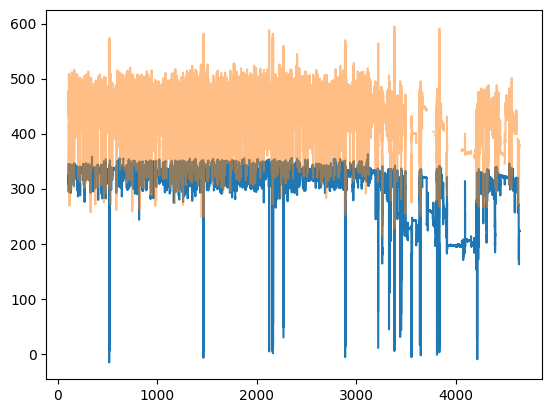

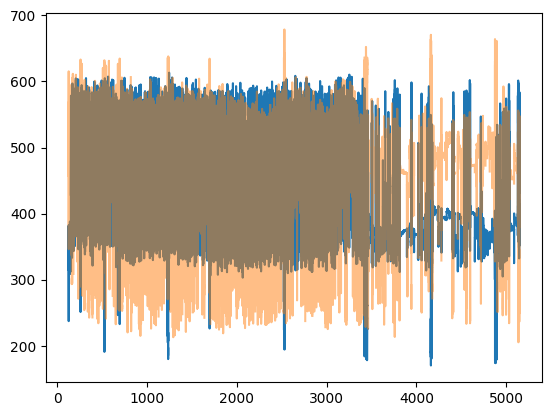

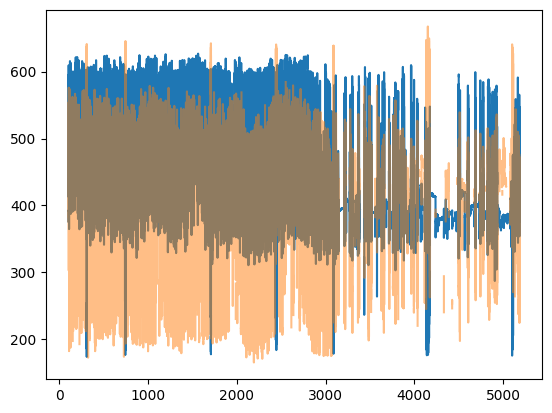

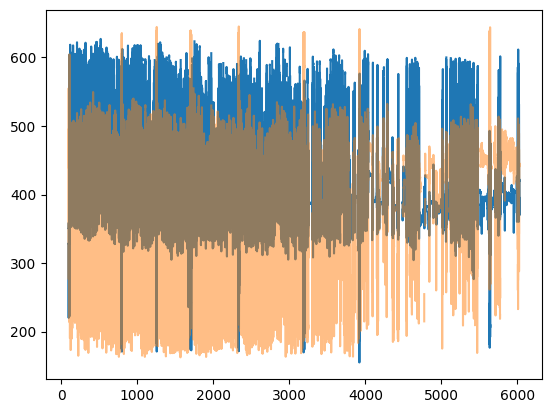

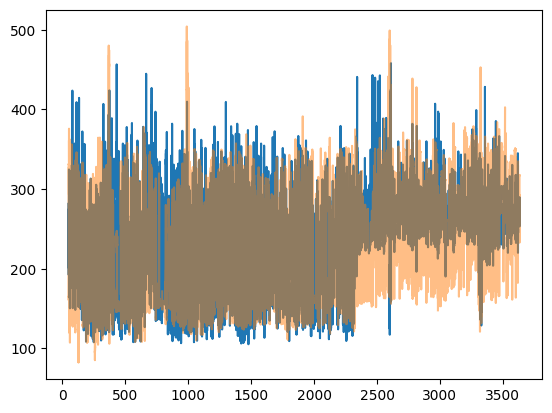

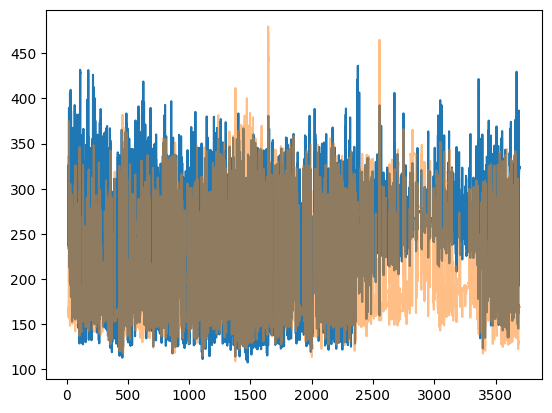

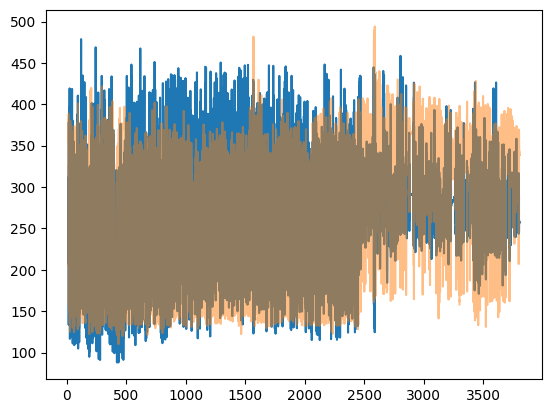

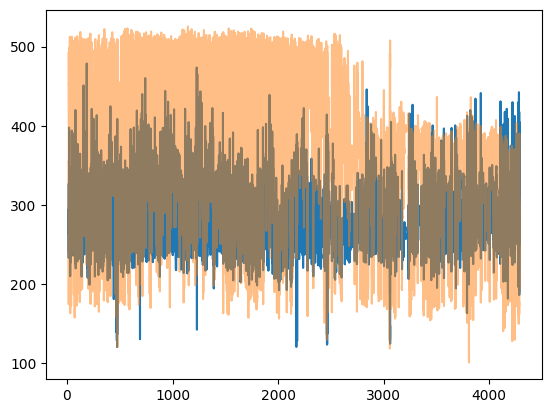

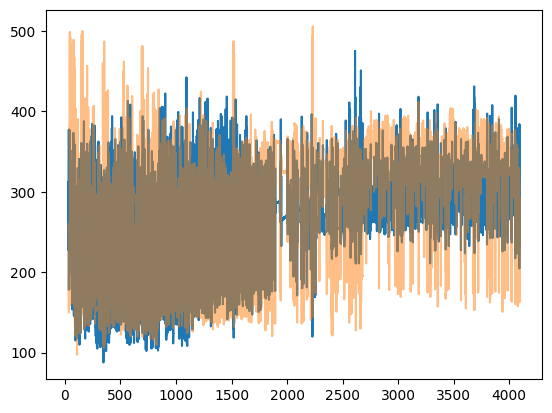

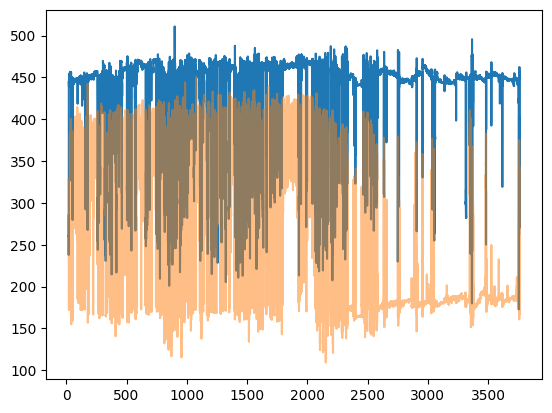

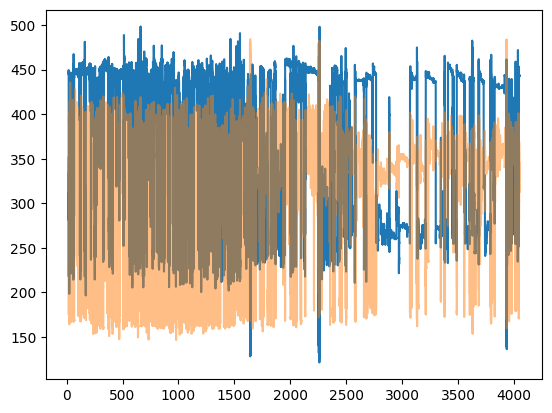

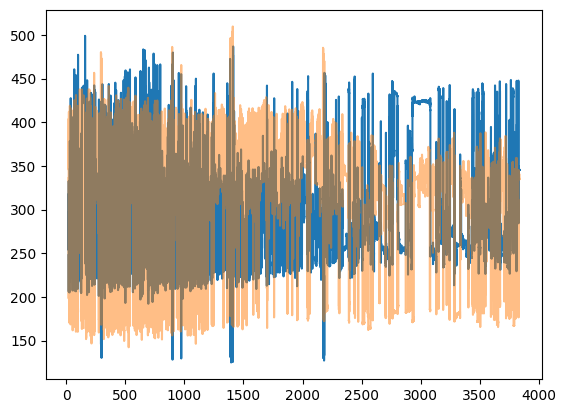

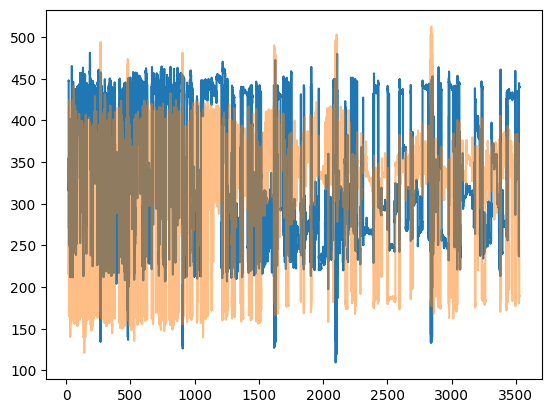

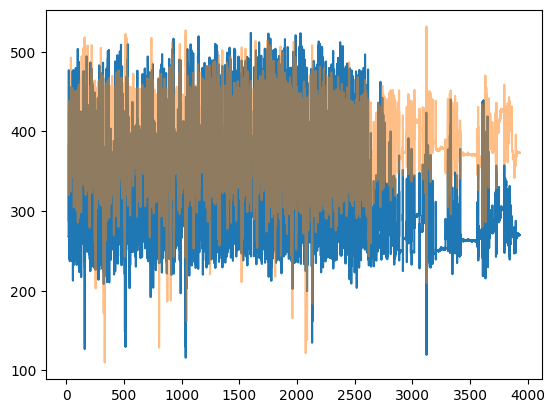

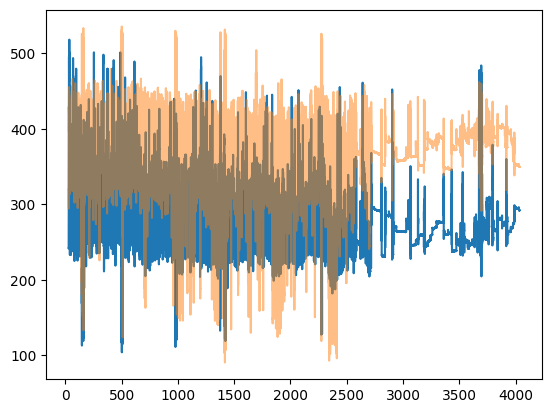

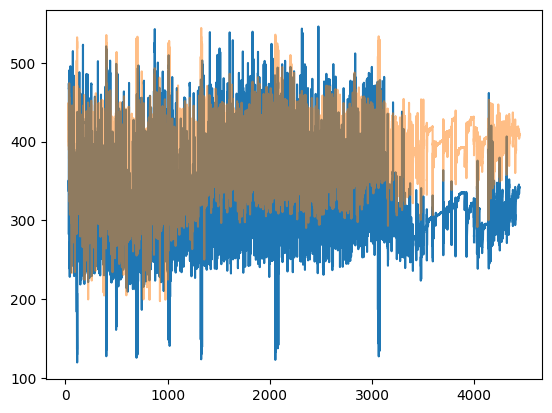

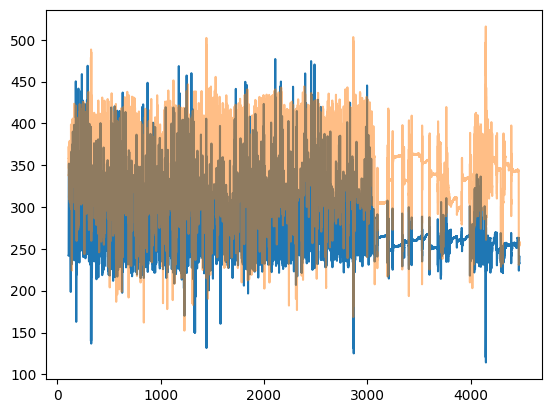

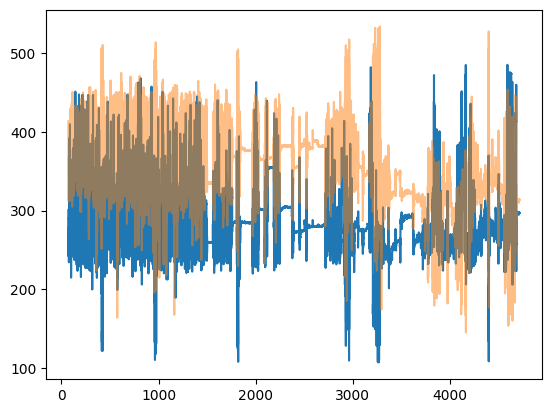

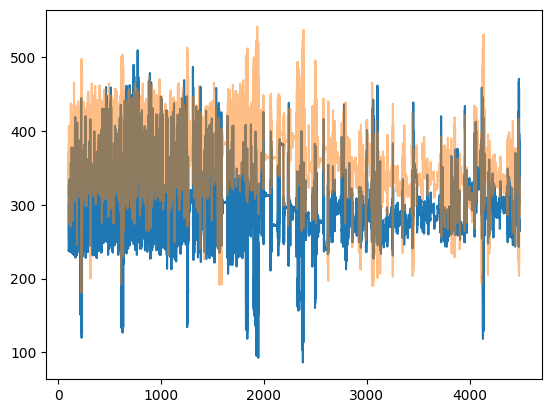

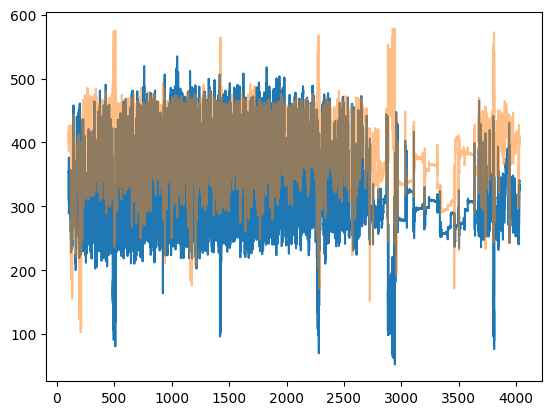

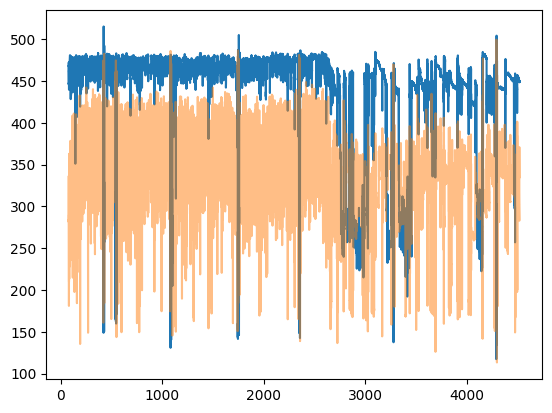

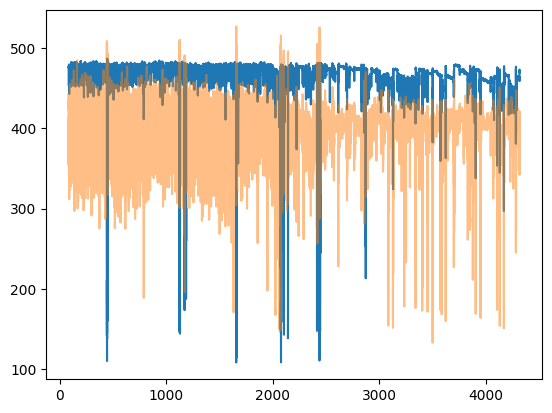

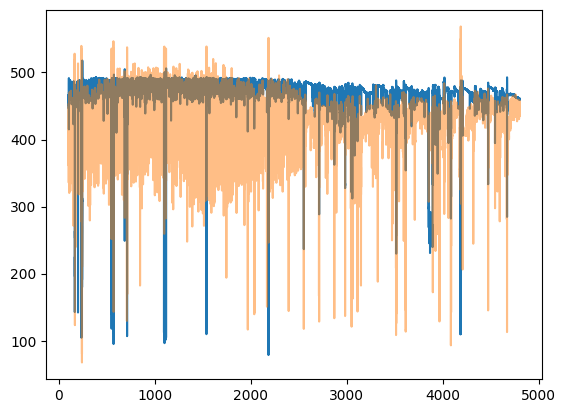

KeyboardInterrupt: 

In [162]:
results_path = prefix + 'representation_learning_variability/paper-individuality/results/qc/design_matrix/'

for m, mat in enumerate(sessions_to_process):

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)

    plt.plot(design_matrix['Bin'], design_matrix['l_paw_x']/2)
    plt.plot(design_matrix['Bin'], design_matrix['r_paw_x'], alpha=0.5)
    plt.show()

In [20]:
results_path = prefix + 'representation_learning_variability/paper-individuality/results/qc/design_matrix/extra_bwm/'

for m, mat in enumerate(sessions_to_process[56:57]):
    

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)

    # Get trials for corresponding session
    trials = one.load_object(mat, obj='trials', namespace='ibl')
    trial_df = trials.to_df()

    # Licking
    lick_times = np.array(design_matrix.loc[design_matrix['Lick count']==1, 'Bin'])
    plot_licks_PSTH(mat, trial_df, lick_times, results_path)

    # Whisking
    plot_whisker_psth(mat, design_matrix, trial_df, 'stimOn_times', results_path)

    # Paws
    plot_paw_hist(mat, design_matrix, results_path)
    plot_paw_choice_psth(mat, design_matrix, trial_df, results_path)
    plot_wheel_choicepsth(mat, design_matrix, trial_df, results_path)
    plot_paw_left_feedbackpsth(mat, design_matrix, trial_df, results_path)
    plot_paw_right_feedbackpsth(mat, design_matrix, trial_df, results_path)
    print(mat)


/home/ines/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/util.py:436: ALFWarning: Multiple revisions: "", "2025-03-03"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


No PSTH for session c728f6fd-58e2-448d-aefb-a72c637b604c


ValueError: need at least one array to stack

In [21]:
mat

'c728f6fd-58e2-448d-aefb-a72c637b604c'

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


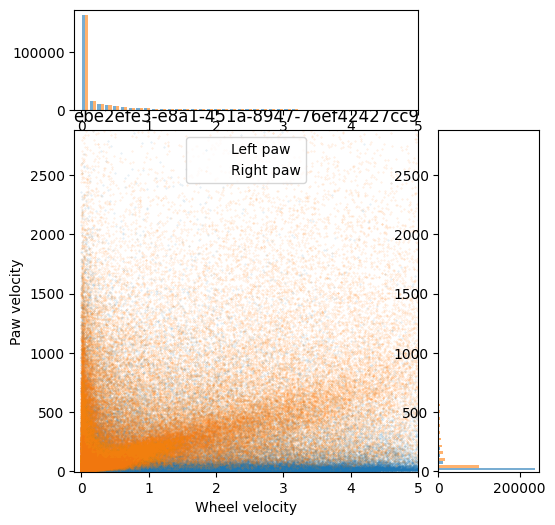

ebe2efe3-e8a1-451a-8947-76ef42427cc9


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


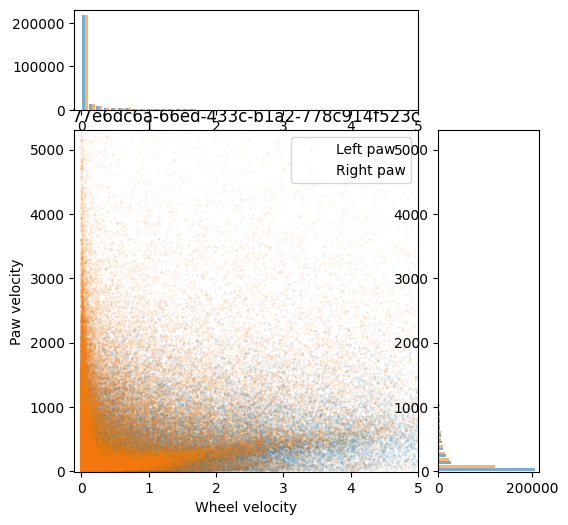

77e6dc6a-66ed-433c-b1a2-778c914f523c


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


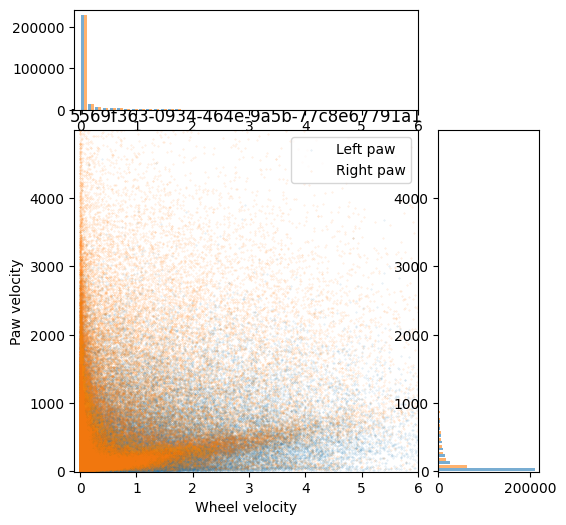

5569f363-0934-464e-9a5b-77c8e67791a1


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


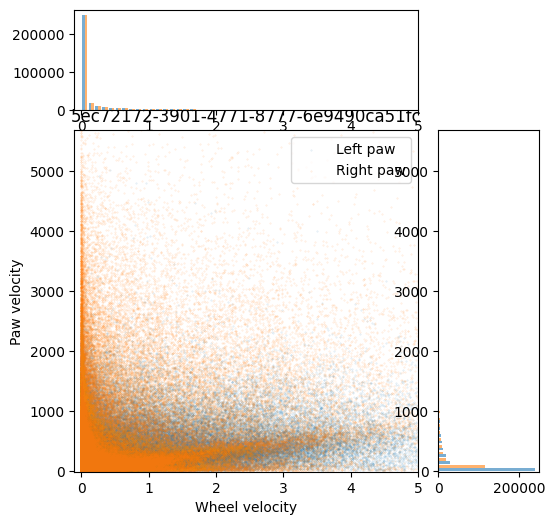

5ec72172-3901-4771-8777-6e9490ca51fc


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


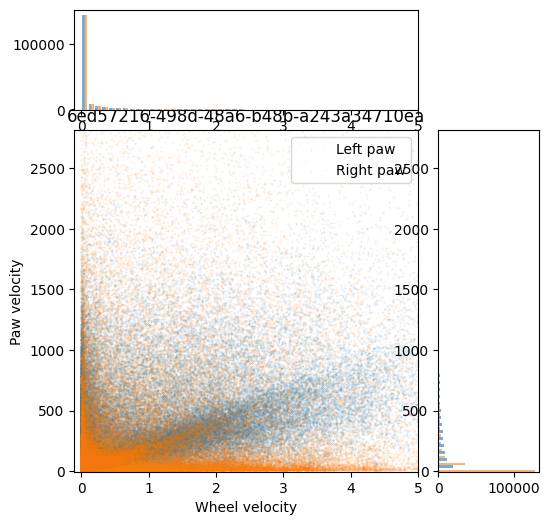

6ed57216-498d-48a6-b48b-a243a34710ea


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


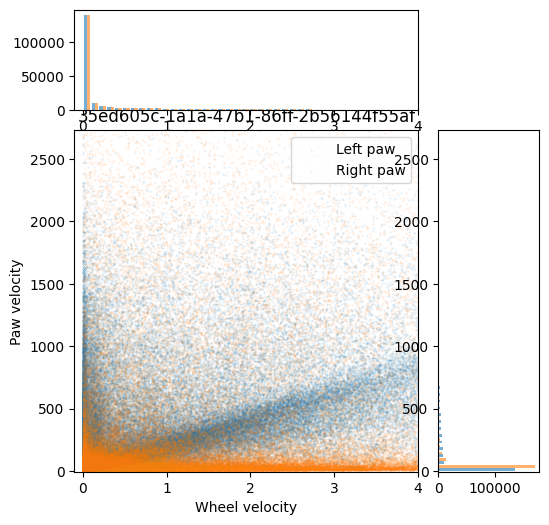

35ed605c-1a1a-47b1-86ff-2b56144f55af


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


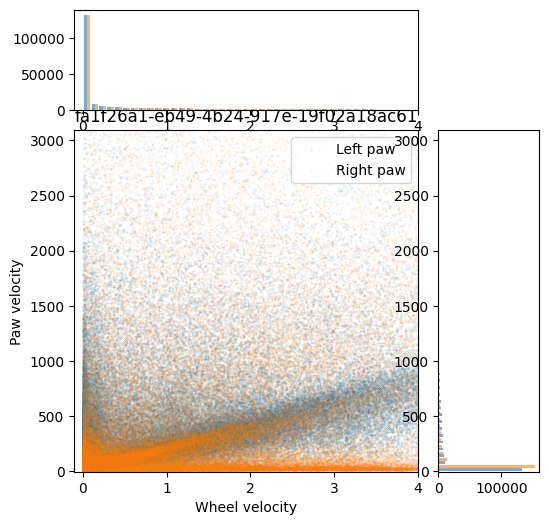

fa1f26a1-eb49-4b24-917e-19f02a18ac61


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


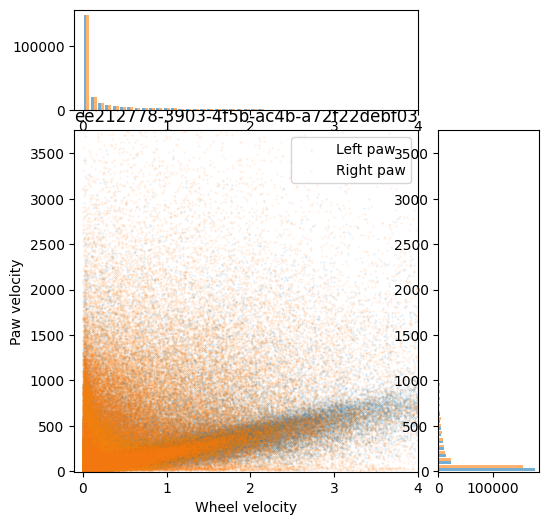

ee212778-3903-4f5b-ac4b-a72f22debf03


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90102/77388379.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


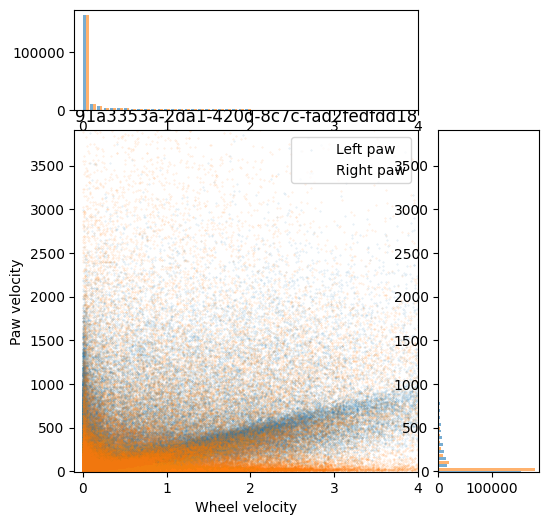

91a3353a-2da1-420d-8c7c-fad2fedfdd18


In [ ]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

paws = ['l_paw', 'r_paw']

for m, mat in enumerate(sessions_to_process):

    file_path = one.eid2path(mat)
    if prefix == '/home/ines/repositories/':
        mouse_name = file_path.parts[8]
    else:
        mouse_name = file_path.parts[7]

    session = mat
    filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
    design_matrix = pd.read_parquet(filename)
    left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=False, feature='l_paw')
    right_speeds = get_speed(design_matrix, design_matrix['Bin'], 'right', 60, split=False, feature='r_paw')
    
    # Create main figure
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    # Define areas
    main_ax = fig.add_subplot(grid[1:4, 0:3])
    x_hist = fig.add_subplot(grid[0, 0:3], sharex=main_ax)
    y_hist = fig.add_subplot(grid[1:4, 3], sharey=main_ax)

    # Scatterplot (two hues)
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), left_speeds[1], alpha=0.2, s=.1, label='Left paw', color='C0')
    main_ax.scatter(np.abs(design_matrix['avg_wheel_vel']), right_speeds[1], alpha=0.2, s=.1, label='Right paw', color='C1')
    main_ax.legend()
    
    # --- Fit and plot regression lines ---
    x1 = x2 = np.array(np.abs(design_matrix['avg_wheel_vel']))
    y1 = left_speeds[1]
    y2 = right_speeds[1]
    
    # # Fit and plot for each group
    # model = LinearRegression()
    # for x, y, color, label in [(x1, y1, 'C0', 'Group 1'), (x2, y2, 'C1', 'Group 2')]:
    #     model.fit(x.reshape(-1, 1), y)
    #     xs = np.linspace(x.min(), x.max(), 100)
    #     ys = model.predict(xs.reshape(-1, 1))
    #     plt.plot(xs, ys, color=color, linewidth=2)

    main_ax.legend()
    # Marginal histograms
    y_hist.hist([left_speeds[1],right_speeds[1]], bins=100, color=['C0', 'C1'], alpha=0.6, orientation='horizontal')
    x_hist.hist([np.abs(design_matrix['avg_wheel_vel']), np.abs(design_matrix['avg_wheel_vel'])], bins=100, color=['C0', 'C1'], alpha=0.6)

    # Hide tick labels on shared axes
    # x_hist.set_xticks([])
    # y_hist.set_yticks([])
    main_ax.set_ylim([-5, int(np.nanmax([left_speeds[1], right_speeds[1]])/2)])
    main_ax.set_xlim([-.1, int(np.nanmax(np.abs(design_matrix['avg_wheel_vel']))/2)])
    main_ax.set_xlabel('Wheel velocity')
    main_ax.set_ylabel('Paw velocity')
    main_ax.set_title(mat)
    plt.tight_layout()
    plt.show()
    print(mat)

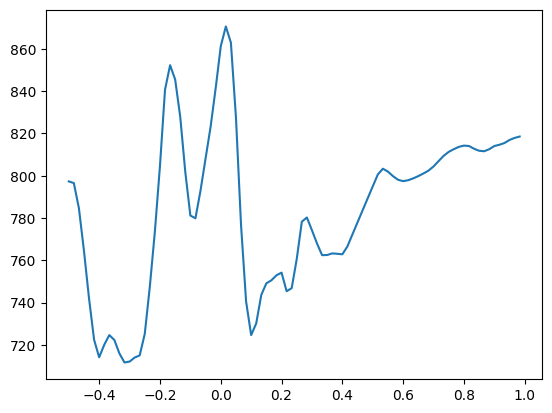

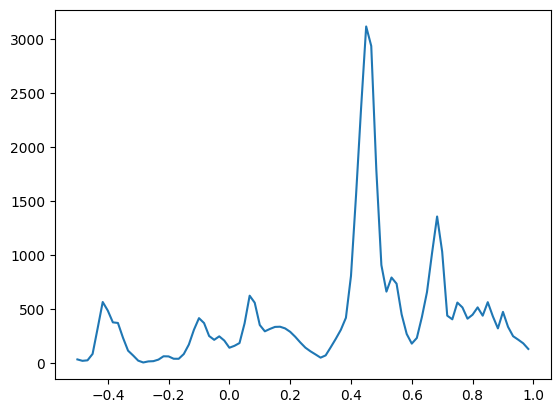

In [ ]:
X, tscale = event_locked_signal(design_matrix['Bin'], design_matrix['l_paw_x'], trial_df['stimOn_times'][50:51])
plt.plot(tscale, X[0])
plt.show()
left_speeds = get_speed(design_matrix, design_matrix['Bin'], 'left', 60, split=False, feature='l_paw')
X, tscale = event_locked_signal(left_speeds[0], left_speeds[1], trial_df['stimOn_times'][50:51])
plt.plot(tscale, X[0])
